In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

## Lectura del archivo obtenido de: 
https://www.kaggle.com/imdevskp/corona-virus-report

In [3]:
dataframe= pd.read_csv('world-data.csv')

## Selección de columnas para el analisis

In [4]:
predataframe1=dataframe.iloc [:, [0,1,2,3,5,7,9,10,11,12,13,14,15]]

## Previsualizacion de nuestros datos

In [5]:
predataframe1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668,2292707,18296.0,15194.0,492.0,63139605,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660,771258,8318.0,13716.0,464.0,13206188,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384,606387,8944.0,1466.0,30.0,22149351,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357,180931,2300.0,5974.0,100.0,29716907,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316,141264,539.0,9063.0,162.0,3149807,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10,2,0.0,2604.0,200.0,61,12220.0,North America
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7,6,0.0,495.0,NaN,424,16154.0,North America
206,Falkland Islands,South America,3.489000e+03,13,NaN,13,0,0.0,3726.0,NaN,1816,520493.0,South America
207,Vatican City,Europe,8.010000e+02,12,NaN,12,0,0.0,14981.0,NaN,12,1.0,Europe


## Verificacion de NAN en nuestro dataset, mostrado por columna

In [6]:
predataframe1.isnull().sum()

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       0
ActiveCases          0
Serious,Critical    55
Tot Cases/1M pop     1
Deaths/1M pop       20
TotalTests           0
Tests/1M pop         1
WHO Region           1
dtype: int64

## Limpieza de datos

La limpieza fue un tema dificil de tratar ya se tuvo que investigar la naturaleza de los datos faltantes y muchos cambios se hicieron en archivo csv, debido a que se debia observar campo por campo su valor faltante y no era recomendable borrar registros ya que son paises importantes y era muy buena tenerlos en cuenta.

Se hizo lo siguiente:
- TotalRecovered: se realizo una resta entre el total de casos y el el total de muertes
- ActiveCases: se realizo una investigacion donde aproximadante el 25% de los casos recuperados se encuentran activos
- Seriuos/Critical: se eliminaron los datos vacios y se hizo un promedio de los que quedaban activo
- TotalDeaths: se sustituyeron los nulos por un cero
- Deaths/1M pop: se sustituyeron por cero ya que muchos paises cuentan con un numero muy pequeño de habitantes y tienden a cero
- Test/1M pop: se realizo la operacion de dividir el numero de habitantes entre un millon y despues el numero de pruebas entre el resultado previo
- WHO Region: se trato manulmente agregagndo solamente el contienente del pais y no especificando exactamete su region

In [8]:
predataframe1 = predataframe1.dropna(subset=["Continent"])
predataframe1['TotalDeaths'].fillna(0.0, inplace=True)

aux=predataframe1['Serious,Critical'].dropna()
predataframe1['Serious,Critical'].fillna(aux.mean(), inplace=True)
predataframe1['Deaths/1M pop'].fillna(0.0, inplace=True)

## Verificacion de la limpieza

In [9]:
predataframe1.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

## Previsualizacion de datos.
 En esta punto se realizo una pequela visualizacion del comportamiento de los datos respecto a las variables de la poblacion de cada pais y el total de muertes registradas, total de recuperados y el total de casos activos hasta el momento que se realizo el corte de la base de datos

<Figure size 2160x1080 with 0 Axes>

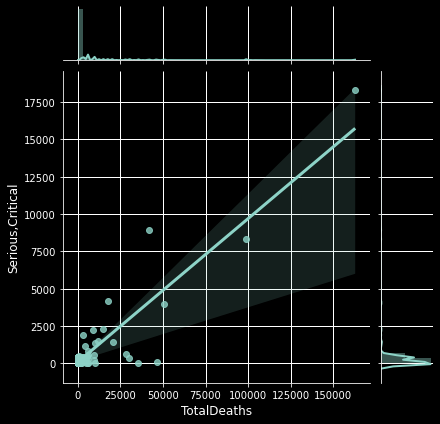

In [10]:
plt.figure(figsize=(30,15))
plt.style.use('Solarize_Light2')
plt.style.use('dark_background')
sns.jointplot(x='TotalDeaths', y='Serious,Critical', data=predataframe1, kind='reg')

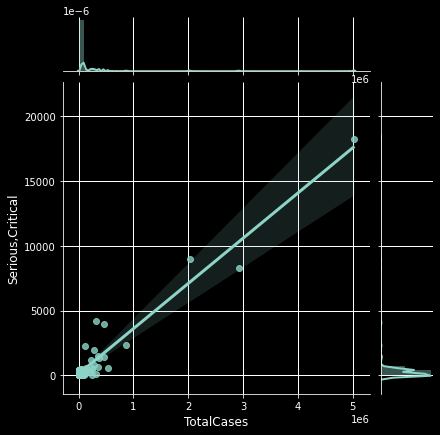

In [11]:
sns.jointplot(x='TotalCases', y='Serious,Critical', data=predataframe1, kind='reg')

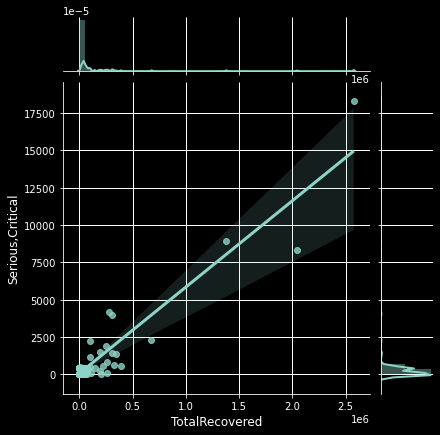

In [12]:
sns.jointplot(x='TotalRecovered', y='Serious,Critical', data=predataframe1, kind='reg')

## Implementación del arbol de regresión

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
predataframe2=predataframe1.iloc [:, [2,3,4,5,6,7,8,9,10,11]]


In [16]:
predataframe2

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,3.311981e+08,5032179,162804.0,2576668,2292707,18296.0,15194.0,492.0,63139605,190640.0
1,2.127107e+08,2917562,98644.0,2047660,771258,8318.0,13716.0,464.0,13206188,62085.0
2,1.381345e+09,2025409,41638.0,1377384,606387,8944.0,1466.0,30.0,22149351,16035.0
3,1.459409e+08,871894,14606.0,676357,180931,2300.0,5974.0,100.0,29716907,203623.0
4,5.938157e+07,538184,9604.0,387316,141264,539.0,9063.0,162.0,3149807,53044.0
...,...,...,...,...,...,...,...,...,...,...
204,4.992000e+03,13,1.0,10,2,0.0,2604.0,200.0,61,12220.0
205,2.624700e+04,13,0.0,7,6,0.0,495.0,0.0,424,16154.0
206,3.489000e+03,13,0.0,13,0,0.0,3726.0,0.0,1816,520493.0
207,8.010000e+02,12,0.0,12,0,0.0,14981.0,0.0,12,1.0


In [17]:
X= predataframe2.drop('Serious,Critical', axis=1)
y= predataframe2['Serious,Critical']

In [18]:
X

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,3.311981e+08,5032179,162804.0,2576668,2292707,15194.0,492.0,63139605,190640.0
1,2.127107e+08,2917562,98644.0,2047660,771258,13716.0,464.0,13206188,62085.0
2,1.381345e+09,2025409,41638.0,1377384,606387,1466.0,30.0,22149351,16035.0
3,1.459409e+08,871894,14606.0,676357,180931,5974.0,100.0,29716907,203623.0
4,5.938157e+07,538184,9604.0,387316,141264,9063.0,162.0,3149807,53044.0
...,...,...,...,...,...,...,...,...,...
204,4.992000e+03,13,1.0,10,2,2604.0,200.0,61,12220.0
205,2.624700e+04,13,0.0,7,6,495.0,0.0,424,16154.0
206,3.489000e+03,13,0.0,13,0,3726.0,0.0,1816,520493.0
207,8.010000e+02,12,0.0,12,0,14981.0,0.0,12,1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
adr = DecisionTreeRegressor(max_depth = 5)

In [38]:
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [39]:
prediccion = adr.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, prediccion))

ValueError: continuous is not supported

In [42]:
print(confusion_matrix(y_test, prediccion))

ValueError: continuous is not supported

In [43]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [44]:
dot_data= export_graphviz(adr)

In [45]:
graph = graph_from_dot_data(dot_data)

In [46]:
graph.write_png('tree.png')

True

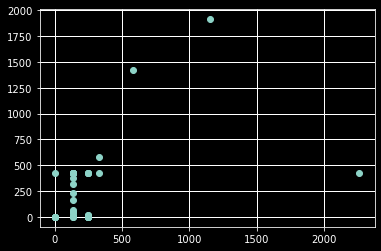

In [47]:
plt.scatter(prediccion, y_test)

In [48]:
print(adr.score(X_train, y_train))

0.990909299334394


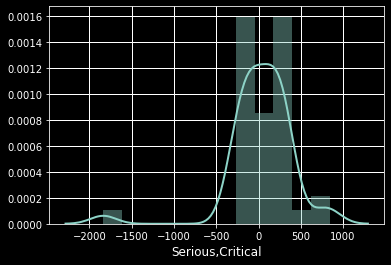

In [49]:
sns.distplot(y_test-prediccion)

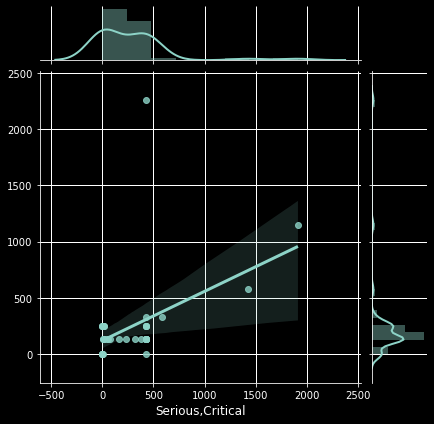

In [50]:
sns.jointplot(y_test,prediccion, kind='reg')